Install & import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import skewtest, boxcox
from sklearn.base import TransformerMixin, BaseEstimator
from tqdm import tqdm

# Load the data

In [2]:
# raw data
train = pd.read_csv('./TRAIN.csv')

In [3]:
train.shape

(499120, 59)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499120 entries, 0 to 499119
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              499120 non-null  int64  
 1   target          499120 non-null  int64  
 2   ps_ind_01       499120 non-null  int64  
 3   ps_ind_02_cat   499120 non-null  int64  
 4   ps_ind_03       499120 non-null  int64  
 5   ps_ind_04_cat   499120 non-null  int64  
 6   ps_ind_05_cat   499120 non-null  int64  
 7   ps_ind_06_bin   499120 non-null  int64  
 8   ps_ind_07_bin   499120 non-null  int64  
 9   ps_ind_08_bin   499120 non-null  int64  
 10  ps_ind_09_bin   499120 non-null  int64  
 11  ps_ind_10_bin   499120 non-null  int64  
 12  ps_ind_11_bin   499120 non-null  int64  
 13  ps_ind_12_bin   499120 non-null  int64  
 14  ps_ind_13_bin   499120 non-null  int64  
 15  ps_ind_14       499120 non-null  int64  
 16  ps_ind_15       499120 non-null  int64  
 17  ps_ind_16_

train.shape

Create a combined dataset to deskew, then split out again

In [5]:
target = train['target']
train.drop('target', axis=1, inplace=True)
train.drop('id', axis=1, inplace=True)

# Scale and PCA

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
scaler = StandardScaler()
train_sc = scaler.fit_transform(train)
pca = PCA()
pca_comp = pca.fit_transform(train_sc)

In [8]:
pca_comp.shape

(499120, 57)

In [9]:
train.shape

(499120, 57)

In [10]:
n_comp_to_keep = 136
print("The first {} components explains {} of the data: "
      .format(n_comp_to_keep , sum(pca.explained_variance_ratio_[:n_comp_to_keep])))

The first 136 components explains 1.0 of the data: 


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     pca_comp[:,:n_comp_to_keep], target, test_size=0.33, random_state=42)


# UMAP projection

In [12]:
!pip install --upgrade llvmlite

  Using cached llvmlite-0.38.0-cp39-cp39-win_amd64.whl (23.2 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [13]:
!pip install umap-learn

In [14]:
import umap
import time

In [15]:
uboat = umap.UMAP()
#start = time.clock()
embedding = uboat.fit_transform(X_train)
#end = time.clock()

C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [16]:
#print('Time taken: {}'.format(end-start))

In [17]:
embedding.shape

(334410, 2)

### plot projection

In [18]:
import matplotlib.pyplot as plt

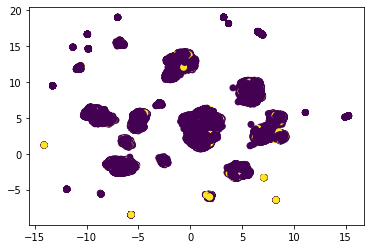

In [19]:
plt.scatter(embedding[:,0], embedding[:,1],c=y_train)

plt.scatter(x1, x2, c= y)

In [21]:
from sklearn.datasets import load_digits 

digits = load_digits()
mapper = umap.UMAP()
embedding = mapper.fit_transform(digits.data)


In [22]:
digits.data.shape

(1797, 64)

In [23]:
(data, target) = load_digits(return_X_y=True)

In [24]:
data.shape

(1797, 64)

In [25]:
target.shape

(1797,)

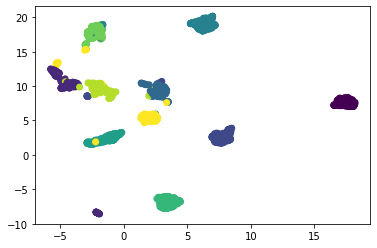

In [26]:
plt.scatter(embedding[:,0], embedding[:,1], c=target.ravel())

# Models

# Metrics

In [27]:
from sklearn.metrics import classification_report, auc, confusion_matrix, recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

In [33]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [37]:
clf.predict_proba(X_test)

array([[0.92740199, 0.07259801],
       [0.94214255, 0.05785745],
       [0.97815961, 0.02184039],
       ...,
       [0.96063981, 0.03936019],
       [0.9506742 , 0.0493258 ],
       [0.97010514, 0.02989486]])

In [38]:
clf.predict_proba(X_test, clf.predict_proba(X_test))

TypeError: predict_proba() takes 2 positional arguments but 3 were given

In [36]:
precision_recall_curve(y_test, clf.predict_proba(X_test))

ValueError: y should be a 1d array, got an array of shape (164710, 2) instead.

In [46]:
roc_auc_score(y_test, clf.predict(X_test))

0.5

In [47]:
confusion_matrix(y_test, clf.predict(X_test))

array([[158687,      0],
       [  6023,      0]], dtype=int64)

In [48]:
report = classification_report(y_test, clf.predict(X_test))

C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    158687
           1       0.00      0.00      0.00      6023

    accuracy                           0.96    164710
   macro avg       0.48      0.50      0.49    164710
weighted avg       0.93      0.96      0.95    164710



C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
